Linear Regression

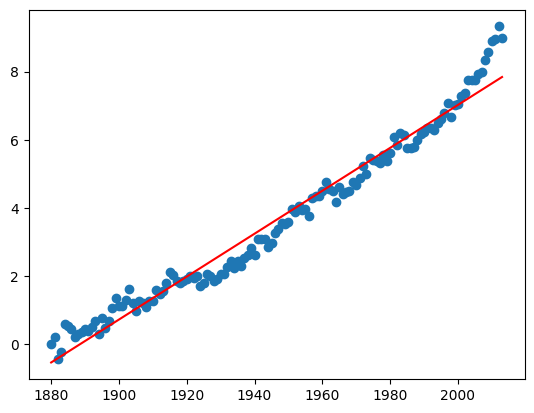

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

train_data = pd.read_csv('epa-sea-level.csv')

# X as input data
# y as output data
X = train_data[['Year']]  # Input predictor variable
y = train_data['CSIRO Adjusted Sea Level']  # Output target variable

# create a linear regression model with X and y
model = LinearRegression()
model.fit(X, y)

# make the linear prediction line with X
y_pred = model.predict(X)

# draw the graph
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()


The hypothesis of Simple Linear Regression:
hθ(x) = θ₀ + θ₁x / y = mx + c
θ₀ = y-intercepter or bias
θ₁ = slope

How to get the best fit line? 
Minimize Error

Mean Absolute Error:
(1/n) * Σ|y - ŷ| = (1/n) * (|y₁ - ŷ₁| + |y₂ - ŷ₂| + ... + |yₙ - ŷₙ|)
n = number of data points
y = actual values
ŷ = predicted values

|| = absolute value operation
For example:
|y1 - ŷ1| = |5 - 7| = |-2| = 2

Mean Squared Error:
(1/n) * Σ(y - ŷ)² = (1/n) * ((y₁ - ŷ₁)² + (y₂ - ŷ₂)² + ... + (yₙ - ŷₙ)²)

Both MAE and MSE can be cost function J(θ₀, θ₁)
Then we can use the cost function in Gradient Descent to adjust θ₀ and θ₁:
new θ₀ = θ₀ - α * ∂(cost function result)/∂θ₀
new θ₁ = θ₁ - α * ∂(cost function result)/∂θ₁

The hypothesis of Multiple Regression:
hθ(x) = θ₀ + θ₁x₁ + θ₁x₁ + ... + θ₂x₂ + θₙxₙ
θ₀ = y-intercepter or bias or base value of output hθ(x)
θₙ = slopes or weights

Cost function:
J(θ₀, θ₁, ..., θₙ) = MAE / MSE

Gradient descent:
θₙ = θₙ - α * ∂(cost function result)/∂θₙ
We need to repeat this n times, from θ₀ to θₙ FIRST. THEN update θ₀ to θₙ simultaneously.
This ensures that the updates are based on the previous values of all the coefficients.

------------------------------------------------------------------------------------------------------------------------------------------------------------

Derivative:
= dy / dx which is function for calculating a slope of linear line or polynomial line at certain point
= d * f(x) / d * x

for example if a polynomial equation is y = x^2, f(x) = x^2
difference of y2 and y1 (dy):
y2 = f(x1 + (x2 - x1)) = (x 1 + (x2 -x1))^2
y1 = f(x1) = x1^2
y2 - y1 = (x1 + (x2 - x1))^2 - x1^2

difference of x2 and x1 (dx):
x2 - x1

dy /dx = slope of polynomial equaltion y = x^2 respect to x = 2x

Power rule:
for f(x) = x^n in df(x)/dx
derivative respect to x will be n * x^(n-1)
if f(x) = 7x^3 
dy/dx = 3 * 7x^2
similarly f(x) = 2x^3 + x^5
dy/dx = 6x^2 + 5x^4

Partial derivative:
=derivative respect to x or y or x1, 2, 3...
∂(cost function result)/∂θₙ 

df(x, y)/dx where f(x, y) = x^3 + y^2
when we calculate partial derivative respect to x
we ignore the y value means set y to 0
f(x, y) = x^3 + 0
d(x^3)/d(x) = 3x^2

then we calculate partial derivative respect to y
we ignore x
f(x, y) = 0 + y^2
d(0 + y^2)/dy = 2y

x and y just variables that affect the output result
it can also write as f(θ₀, θ₁, ..., θₙ)
df(θ₀, θ₁, ..., θₙ)/dθₙ calculte the partial derivative respect to θₙ
other variables θ₀, θ₁, ..., θₙ₋₁ will be treat as constants, but not necessary to be 0 in machine learning
so the new Wₙ which is nth weight will be calculate as Wₙ - learning rate * df(θ₀, θ₁, ..., θₙ) / dθₙ

Important --------------------------------------------------------------------------------------------------------------------------------------------------

In Gradient descent of machine learning, we do it with J(θ₀, θ₁, ..., θₙ) not f(θ₀, θ₁, ..., θₙ) !!!!
dJ(θ₀, θ₁, ..., θₙ) / dθₙ will be the partial deviative of WEIGHTS
IN RESPECT OF WEIGTHS NOT VARIABLES !!!

see Batch Gradient Descent code below
graph of cost functions:
Z index = global cost / error
Y index = weight 1
X index = weight 2
nth index = nth weight
= N Dimension graph

The function f(θ₀, θ₁) represents the model or hypothesis function that maps the input variables (θ₀ and θ₁) to predicted outputs.
The cost function J(θ₀, θ₁) quantifies the error or discrepancy between the predicted outputs of the model and the actual outputs.

Polynomial Regression

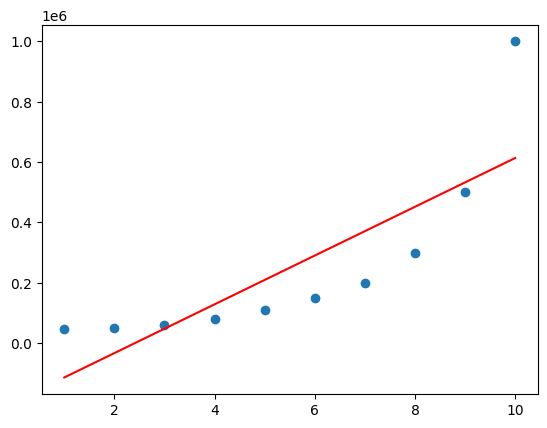

In [7]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read the data from the CSV file
train_data = pd.read_csv('Positions_salaries.csv')

# Linear Regression
X = train_data[['Level']]  # Input predictor variable
y = train_data['Salary']  # Output target variable

# Create and fit a linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

y_pred = lr_model.predict(X)

# Plot the actual data points and the linear regression line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

We can see that Linear Regression not suitable for some situations

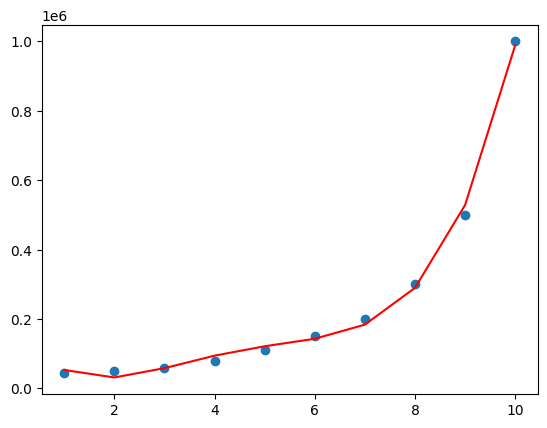

In [8]:
# Polynomial Regression
poly_feat = PolynomialFeatures(degree=4)  # Create a polynomial feature transformer

X_poly = poly_feat.fit_transform(X)  # Transform the input data into polynomial features

# Create and fit a polynomial regression model
pr_model = LinearRegression()
pr_model.fit(X_poly, y)

y_pred = pr_model.predict(X_poly)

# Plot the actual data points and the polynomial regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()


Overfitting:
When Error nearly = 0
Learned hypothesis fit training set very well
But cannot make accurate predictions with new sets

Cause by:
Too many variables in a training set (like multiple regression)
Over correction of coefficients (like bias and weights)
The training data size is too small and does not contain enough data samples to accurately represent all possible input data values

Solutions:
1. Reduce numbers of variable manually or model selection algorithms
2. Regularization:
Reduce magnitude (absolute value) of coefficients 
(Without regularization, gradient descent may lead to overly large coefficients, potentially resulting in overfitting)

L1 Regularization (Lasso)
(1/n) * { Σ(y - ŷ)² + λ * Σ|coefficient| } 
(Σ|coefficient| = |coefficient_1| + |coefficient_2| + ... + |coefficient_n|)

L2 Regularization (Ridge)
(1/n)* { Σ(y - ŷ)² + λ * Σ(coefficient²) }
(Σ(coefficient²) = coefficient_1² + coefficient_2² + ... + coefficient_n²)

Apply regularization to loss function (MSE, MAE, ...) and do gradient descent till error small enough or reach epochs

But isnt the error closer to 0 means the increase of magnitude of coefficients?
(With regularization, error decrease != magnitude of coefficient increase because the existance of penalty (λ * Σ|coefficient| / λ * Σ(coefficient²)))

Lasso: (CAN CHECK LAB3 Q1)
1. Features selection
It tends to drive some coefficients to exactly zero
Identify the most relevant ones in large number of features
2. Sparse outputs
Can be useful explicitly focus on a subset of important features

Ridge
1. Computationally efficient
2. Less sensitive to outliers
Model more robust(strong) by reducing the impact of extreme values in the training data

Feature scaling of regularization:
Features(variables) values may have different magnitude
Ages can be 0-100
Salary can be 0-millions
Regularization with different scales will be unfair
So feature scaling make sure features are on similar scales

2 common scalings:
1. Standardizing
2. Normalizing

Standardizing:

Standard deviation :
σ = sqrt(1/n * Σ(xi - μ)^2)
xi = i-th value of the feature
μ = mean of the feature

Standardized value = (xi - μ) / σ
xi(i-th value of the feature) - mean of feature / standard deviation

Turn all values in features into standardized values before regularization

In [ ]:
# CAN CHECK LAB3 Q2

from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the feature data and transform the feature
standardized_feature = scaler.fit_transform(feature_data)

Normalizing:
Normalized value = (xi - min) / (max - min)
min = minimum value of the feature
max = maximum value of the feature

The result of normalized value will be ranged between 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the feature data and transform the feature
normalized_feature = scaler.fit_transform(feature_data)

Batch Gradient Descent

C:\Users\jimmy\AppData\Local\Temp\ipykernel_19484\394157088.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Iteration 1: Cost 142912087110.3961, Weight         -203.84960950000007, Bias -24.939944
Iteration 2: Cost 143758103989.7204, Weight         -408.59814746577507, Bias -50.004555279625
Iteration 3: Cost 144610779035.6835, Weight         -614.1487528389222, Bias -75.18428471625914
Iteration 4: Cost 145470164670.85028, Weight         -820.504576893946, Bias -100.47958495879217
Iteration 5: Cost 146336313730.5317, Weight         -1027.668783286715, Bias -125.89091043457972
Iteration 6: Cost 147209279466.03445, Weight         -1235.644548103108, Bias -151.41871735643088
Iteration 7: Cost 148089115547.9362, Weight         -1444.4350599078512, Bias -177.06346372962324
Iteration 8: Cost 148975876069.38684, Weight         -1654.0435197935476, Bias -202.8256093589455
Iteration 9: Cost 149869615549.4355, Weight         -1864.4731414299001, Bias -228.70561585576786
Iteration 10: Cost 150770388936.38382, Weight         -2075.7271511131257, Bias -254.70394664513987
Iteration 11: Cost 151678251611.16

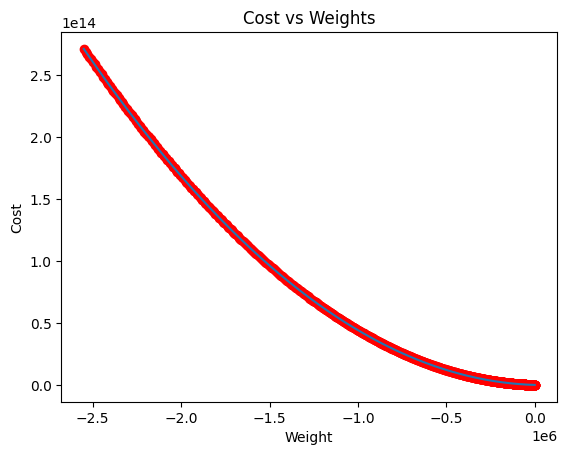

Estimated Weight: -2560647.329745991
Estimated Bias: -363421.4100239783


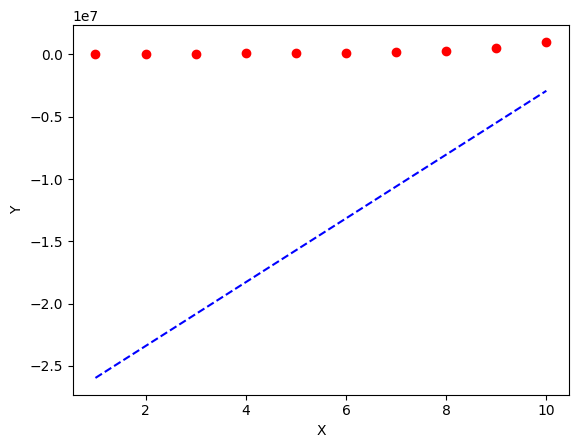

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def gradientDescent (x, y, iterations = 1000, learning_rate = 0.0001
                     , stopping_threshold = 1e-6):
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None
    
    for i in range(iterations):

        y_pred = (current_weight * x) + current_bias

        current_cost = mean_squared_error(y, y_pred)

        if previous_cost and abs(previous_cost - current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        w_derivative = (1/n) * np.sum(x * (y - y_pred))
        b_derivative = (1/n) * np.sum(y - y_pred)

        # if we have multiple weights
        # w1_derivative = -(2/n) * np.sum(x[:, 1] * (y - y_pred))
        # w2_derivative = -(2/n) * np.sum(x[:, 2] * (y - y_pred))
        # w3_derivative = -(2/n) * np.sum(x[:, 3] * (y - y_pred))

        current_weight -= (learning_rate * w_derivative)
        current_bias -= (learning_rate * b_derivative)

        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")

    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias


train_data = pd.read_csv('Positions_salaries.csv')

X = train_data[['Level']]
Y = train_data['Salary']

X = X.to_numpy()
Y = Y.to_numpy()

Y = Y.reshape(-1, 1)

estimated_weight, estimated_bias = gradientDescent(X, Y)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
    
Y_pred = estimated_weight * X + estimated_bias

plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
            markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Perceptron algorithm

For classification problems
Set linear boundary:
w₁ * x₁ + w₂ * x₂ + ... + wₙ * xₙ + b = 0 = y

Step function:
If y >= 0 output 1
If y < 0  output 0

